<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_1_3_Running_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running Gradient Descent

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Portland Housing Gradient Descent

In [2]:
path = 'https://raw.githubusercontent.com/PaulToronto'
path += '/Stanford-Andrew-Ng-Machine-Learning-Specialization/main'
path += '/data/Portland.csv'

portland = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
portland['Price'] = portland['Price'] / 1000.0
portland.head()

,Size,Bedrooms,Price
0,2104,3,399.9
1,1600,3,329.9
2,2400,3,369.0
3,1416,2,232.0
4,3000,4,539.9


In [3]:
X = np.array(portland[['Size']])
y = np.array(portland['Price'])

model = LinearRegression()
model.fit(X, y)

# ideal w and b
w_best, b_best = model.coef_[0], model.intercept_
w_best, b_best

(0.13452528772024133, 71.2704924487291)

In [4]:
y_pred = model.predict(X)

In [5]:
# housing data
X = X.flatten()

# regression line
def f_wb(x, w, b):
    return np.dot(w, x) + b

# cost function
def J_wb(x_train, y_train, w, b):
    m = x_train.shape[0]
    return (1/(2*m)) * sum((f_wb(x_train, w, b) - y_train)**2)

# partial derivative functions
def J_wb_prime_w(x_train, y_train, w, b):
    m = x_train.shape[0]
    return (1/m) * sum((f_wb(x_train, w, b) - y_train) * x_train)

def J_wb_prime_b(x_train, y_train, w, b):
    m = x_train.shape[0]
    return (1/m) * sum(f_wb(x_train, w, b) - y_train)

In [6]:
minimized_cost = J_wb(X, y, w_best, b_best)
minimized_cost, mean_squared_error(y, y_pred) / 2

(2058.132740433041, 2058.1327404330414)

In [7]:
# w, b are initial values
def plot_portland_housing(x_train, y_train, w, b, alpha, iterations):

    fig = plt.figure(figsize=(12, 12))
    gs = GridSpec(3, 2)

    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1:, :], projection='3d')

    # housing data scatter plot
    ax1.scatter(x_train, y_train, marker='x', c='red')
    ax1.set_title('Housing Prices')
    ax1.set_xlabel('Size in ${feet}^2$')
    ax1.set_ylabel('Price in \$1000\'s')

    w_space = np.linspace(-0.5, 0.5, 100)
    b_space = np.linspace(-1000, 1000, 100)
    W_space, B_space = np.meshgrid(w_space, b_space)
    Z_cost = np.zeros_like(W_space)

    # 3D surface plot
    for i in range(W_space.shape[0]):
        for j in range(W_space.shape[1]):
            Z_cost[i, j] = J_wb(x_train, y_train, W_space[i, j], B_space[i, j])
    ax3.plot_surface(W_space, B_space, Z_cost, cmap='Greens', alpha=0.6)
    ax3.plot_wireframe(W_space, B_space, Z_cost, color='k', alpha=0.1)
    ax3.set_title('$J(w,b)$')
    ax3.set_xlabel('$w$')
    ax3.set_ylabel('$b$')
    ax3.set_zlabel('$J(w,b)$')
    ax3.view_init(30, -120)

    # Contour plot
    ax2.contour(W_space, B_space, np.log(Z_cost), levels=17, cmap='Greens')
    ax2.set_title('$J(w,b)$')
    ax2.set_xlabel('$w$')
    ax2.set_ylabel('$b$')

    x = np.linspace(x_train.min(), x_train.max(), 100)
    colors = plt.cm.jet(np.linspace(0, 1, 25))
    color_index = 0

    for i in range(iterations):

        if i != 0:
            tmp_w = w - alpha * J_wb_prime_w(x_train, y_train, w, b)
            tmp_b = b - alpha * J_wb_prime_b(x_train, y_train, w, b)
            w = tmp_w
            b = tmp_b

        if i % 3_000_000 == 0:
            # regression line
            ax1.plot(x, f_wb(x, w, b), color=colors[color_index])
            # plot (w,b) on contour
            ax2.scatter(w, b, s=100, marker='x', color=colors[color_index])
            # plot (w,b) on 3D surface
            ax3.scatter(w, b, s=100, marker='x', color=colors[color_index])
            print(f'(w,b) = ({np.round(w, 2)},{np.round(b, 2)}), cost = {J_wb(x_train, y_train, w, b)}')
            color_index += 1

    fig.suptitle(f'Final Model: $f_{{w,b}}(x) = {np.round(w, 2)}x + {np.round(b, 2)}$, Final Cost: ${np.round(J_wb(x_train, y_train, w, b), 2)}$')


(w,b) = (-0.1,900), cost = 83683.9828405
(w,b) = (-0.17,777.1), cost = 35379.11326759896
(w,b) = (-0.13,672.43), cost = 26228.97607851008
(w,b) = (-0.09,583.28), cost = 19591.52036682006
(w,b) = (-0.05,507.35), cost = 14776.74902358526
(w,b) = (-0.03,442.68), cost = 11284.142203352361
(w,b) = (-0.0,387.6), cost = 8750.625753419918
(w,b) = (0.02,340.69), cost = 6912.827818395819
(w,b) = (0.04,300.73), cost = 5579.700003075841
(w,b) = (0.05,266.7), cost = 4612.656924992309
(w,b) = (0.06,237.72), cost = 3911.1695626239784
(w,b) = (0.07,213.04), cost = 3402.3147548960937
(w,b) = (0.08,192.01), cost = 3033.1944695729394
(w,b) = (0.09,174.11), cost = 2765.4367851262236
(w,b) = (0.1,158.86), cost = 2571.20693531535
(w,b) = (0.1,145.87), cost = 2430.313744386473
(w,b) = (0.11,134.8), cost = 2328.1106521766546
(w,b) = (0.11,125.38), cost = 2253.9731300690787
(w,b) = (0.11,117.36), cost = 2200.194207480871
(w,b) = (0.12,110.52), cost = 2161.1832932699213
(w,b) = (0.12,104.7), cost = 2132.8850054

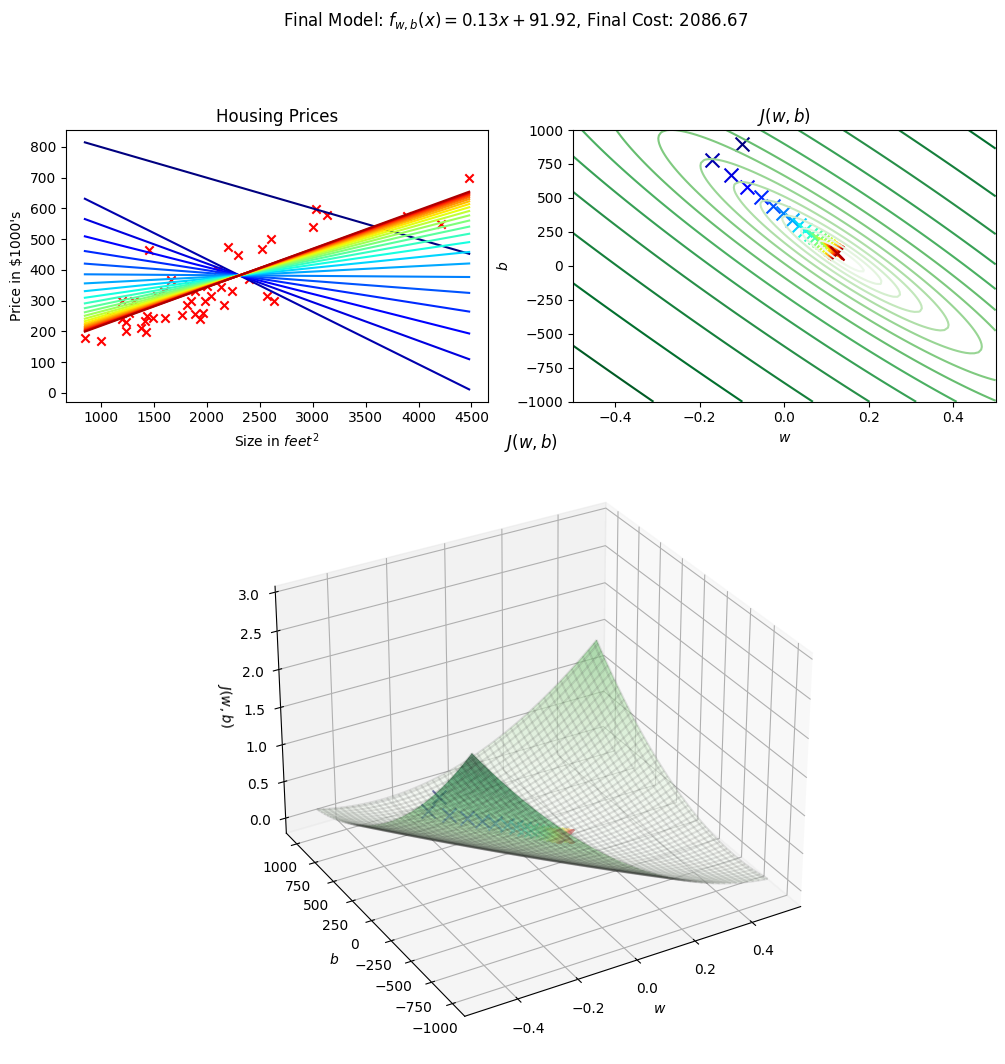

In [8]:
w = -0.1; b = 900
alpha = 4.0e-7
iterations = 69_000_001
plot_portland_housing(X, y, w, b, alpha, iterations)